In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
from sklearn.feature_selection import RFE

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB

In [162]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [163]:
import pickle

import warnings

In [164]:
data = pd.read_csv('F:/Kaggle_Datasets/heart_failure_clinical_records_dataset.csv')

In [165]:
data_1 = data.copy()
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [166]:
data.shape

(299, 13)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [168]:
data.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [169]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


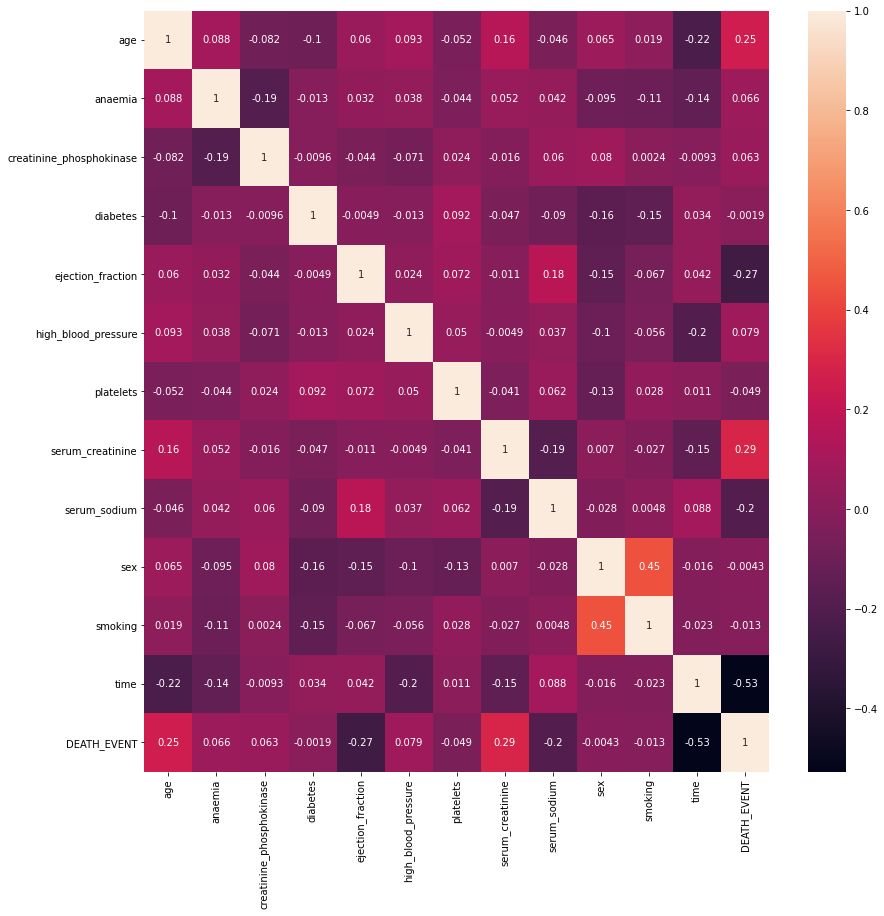

In [170]:
plt.figure(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True)
plt.show()

c:\users\vidush\pyenv\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


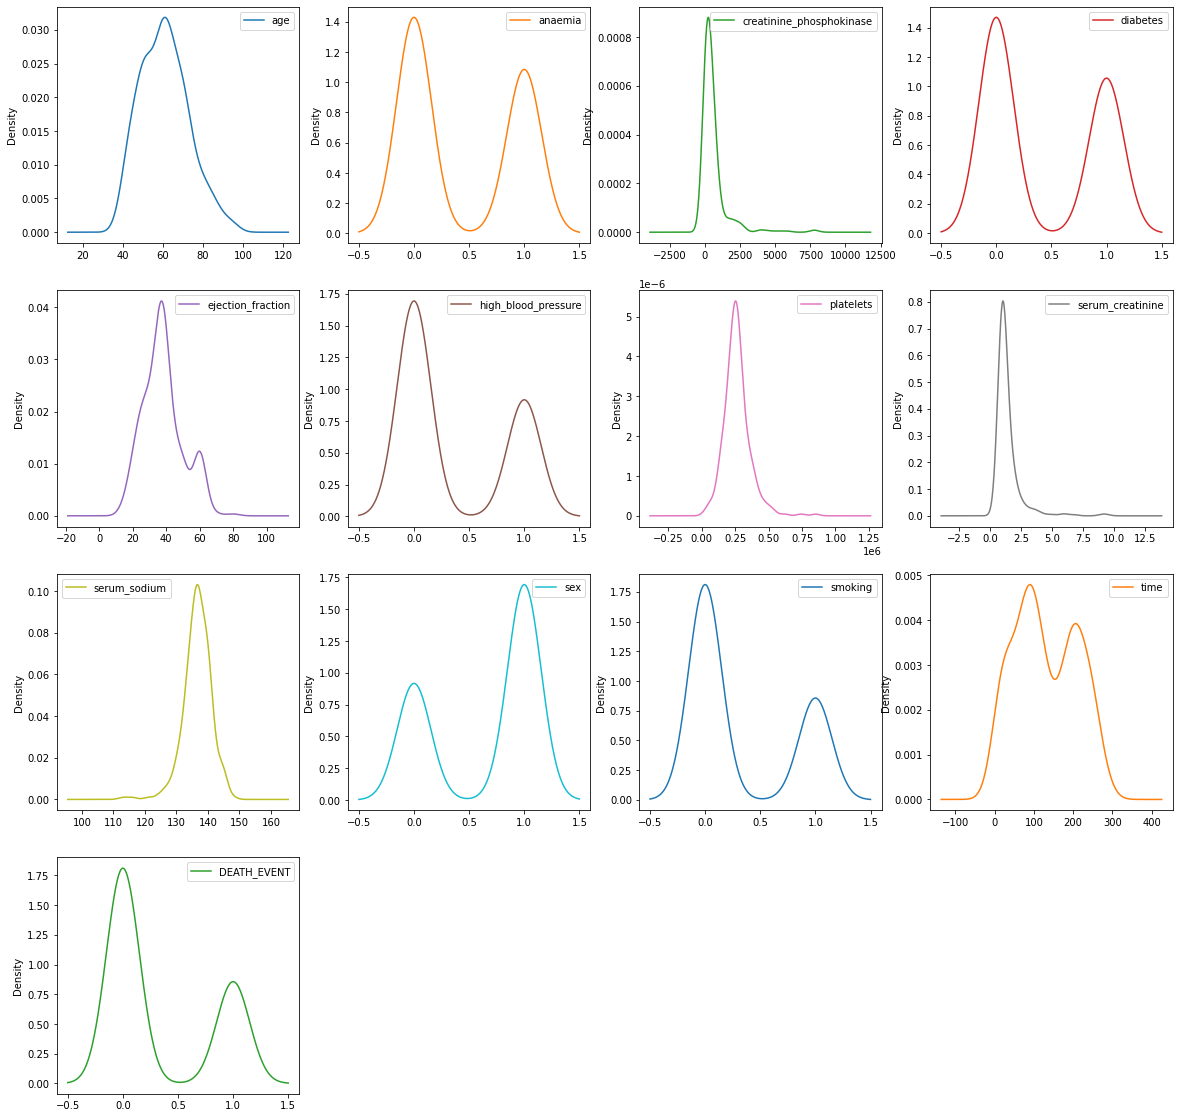

In [171]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

c:\users\vidush\pyenv\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


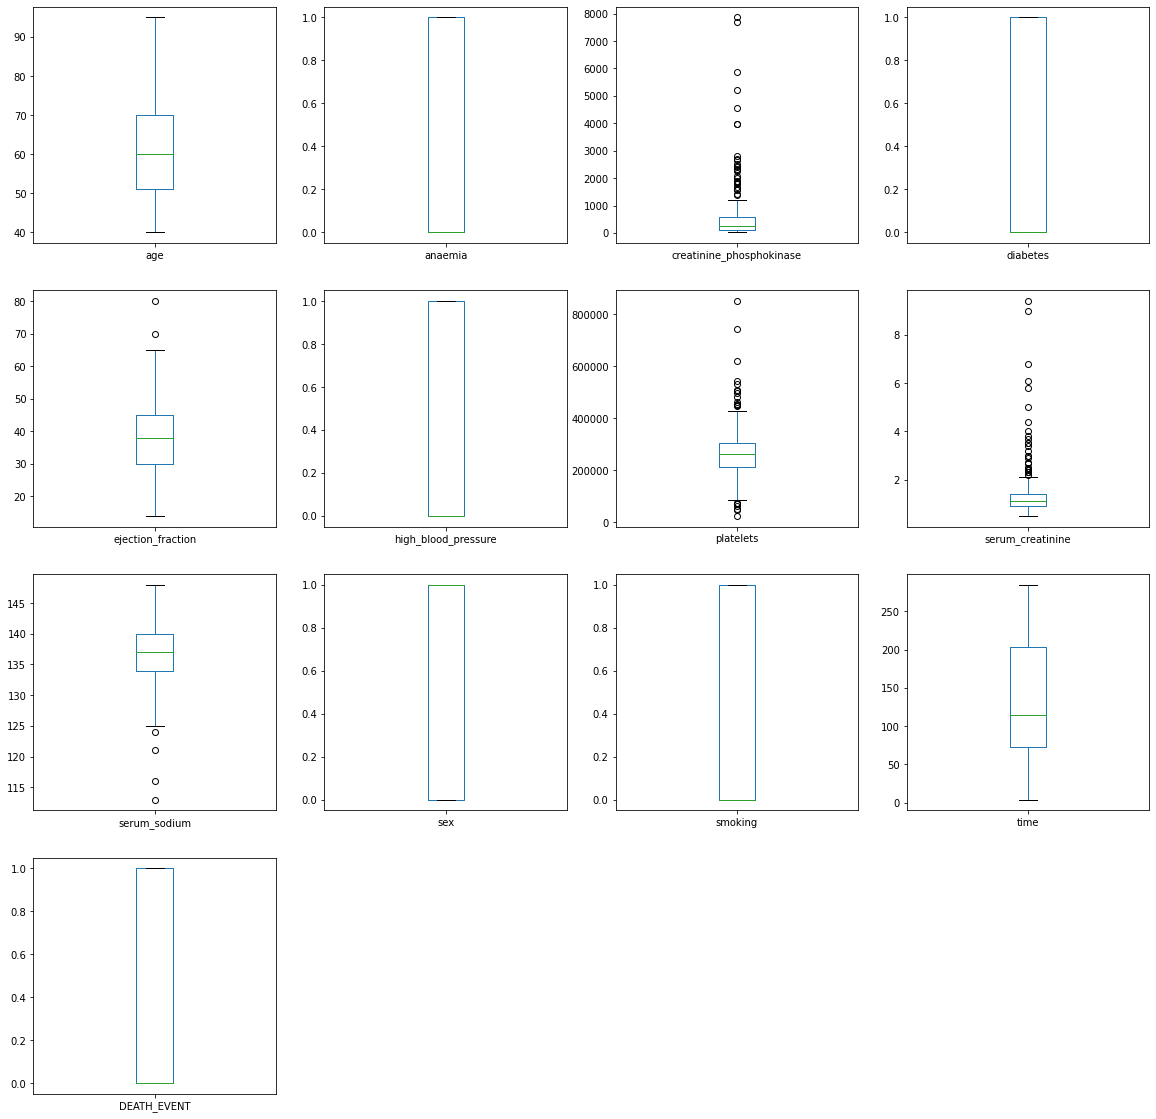

In [172]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

## Age Feature 

Percentage of Super Senior people lose their life : 72.22222222222221


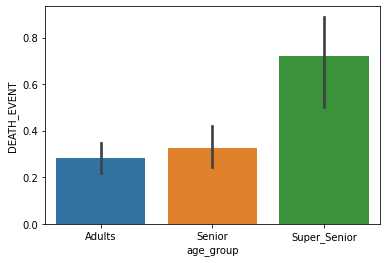

In [173]:
bins = [40, 60, 80, np.nan]
labels = ['Adults', 'Senior', 'Super_Senior']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

print('Percentage of Super Senior people lose their life :', data['DEATH_EVENT'][data['age_group']=='Super_Senior'].value_counts(normalize=True)[1]*100)

sns.barplot(x='age_group', y='DEATH_EVENT', data=data)
plt.show()

## Anemia Feature

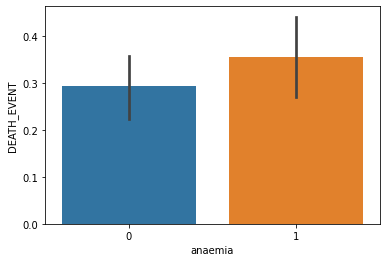

In [174]:
sns.barplot(x='anaemia', y='DEATH_EVENT', data=data)
plt.show()

## Creatinine Phosphokinase: Level of the CPK enzyme in the blood 

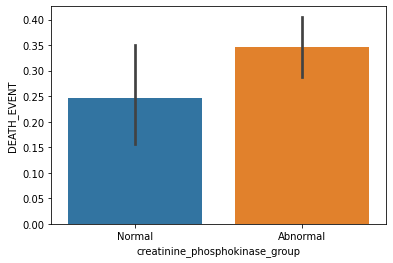

In [175]:
bins = [10, 120, np.nan]
labels = ['Normal','Abnormal']
data['creatinine_phosphokinase_group'] = pd.cut(data['creatinine_phosphokinase'], bins=bins, labels=labels)

sns.barplot(x='creatinine_phosphokinase_group', y='DEATH_EVENT', data=data)
plt.show()

## Diabetes

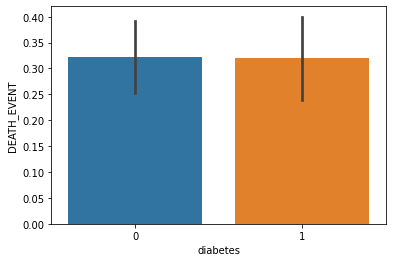

In [176]:
sns.barplot(x='diabetes', y='DEATH_EVENT', data=data)
plt.show()

## Ejection Fraction: Percentage of blood leaving the heart at each contraction 

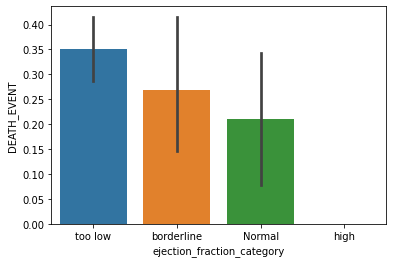

In [177]:
bins = [0, 41, 50, 70, np.nan]
labels = ['too low', 'borderline', 'Normal', 'high']
data['ejection_fraction_category'] = pd.cut(data['ejection_fraction'], bins=bins, labels=labels)

data['ejection_fraction_category'].value_counts()

sns.barplot(x='ejection_fraction_category', y='DEATH_EVENT', data=data)
plt.show()

## High Blood Pressure 

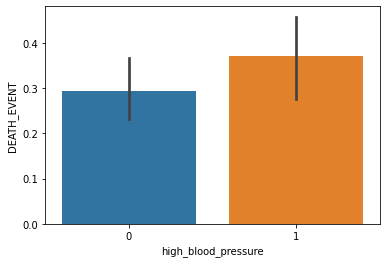

Percentage of people resulted in Heart Failure having high blood pressure :  37.142857142857146


In [178]:
sns.barplot(x='high_blood_pressure', y='DEATH_EVENT', data=data)
plt.show()

print('Percentage of people resulted in Heart Failure having high blood pressure : ', data['DEATH_EVENT'][data['high_blood_pressure']==1].value_counts(normalize=True)[1]*100)

## Platelets : Platelets in the blood (kiloplatelets/mL)

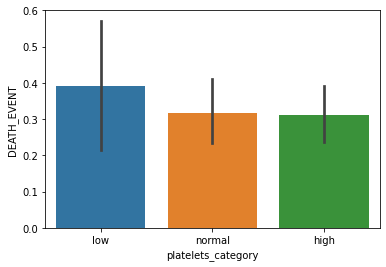

In [179]:
bins =[0, 150000, 250000, np.nan]
labels =['low', 'normal', 'high']
data['platelets_category'] = pd.cut(data['platelets'], bins=bins, labels=labels)

sns.barplot(x='platelets_category', y='DEATH_EVENT', data=data)
plt.show()

In [180]:
array = data_1.values
array

array([[7.500e+01, 0.000e+00, 5.820e+02, ..., 0.000e+00, 4.000e+00,
        1.000e+00],
       [5.500e+01, 0.000e+00, 7.861e+03, ..., 0.000e+00, 6.000e+00,
        1.000e+00],
       [6.500e+01, 0.000e+00, 1.460e+02, ..., 1.000e+00, 7.000e+00,
        1.000e+00],
       ...,
       [4.500e+01, 0.000e+00, 2.060e+03, ..., 0.000e+00, 2.780e+02,
        0.000e+00],
       [4.500e+01, 0.000e+00, 2.413e+03, ..., 1.000e+00, 2.800e+02,
        0.000e+00],
       [5.000e+01, 0.000e+00, 1.960e+02, ..., 1.000e+00, 2.850e+02,
        0.000e+00]])

In [181]:
X = array[:,:12]
Y = array[:, 12]

In [182]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.67, random_state=1, shuffle=True)

## Scaling 

In [183]:
scaler = StandardScaler()
rescaled_X = scaler.fit_transform(x_train)
print(rescaled_X[:5])

[[-0.24551621  1.13095967  1.51464342  1.28399714  0.04496884 -0.81302949
   0.2879158  -0.3726744   0.84019006 -1.37198868 -0.66421116  0.79189932]
 [-0.24551621  1.13095967 -0.51530291 -0.77881794 -1.58723367 -0.81302949
  -0.49111079 -0.633982    0.43755619  0.72886899  1.50554531 -0.6772304 ]
 [ 0.01888586  1.13095967  1.0475922  -0.77881794  0.45301947 -0.81302949
  -1.78291436 -0.633982    0.03492233  0.72886899 -0.66421116  0.77901221]
 [ 0.19515391 -0.88420483 -0.45078806 -0.77881794  0.8610701  -0.81302949
  -0.58972175 -0.28557187  1.6454578   0.72886899  1.50554531  0.95943165]
 [-0.24551621 -0.88420483 -0.32811896 -0.77881794 -0.36308178 -0.81302949
   0.24847141  0.23704332  0.63887313  0.72886899 -0.66421116  1.60378679]]


##  Recursive Feature Elimination Technique(RFE)

In [184]:
# Recursive Feature Elimination

model = LogisticRegression()
rfe = RFE(model, 6)
fit = rfe.fit(rescaled_X, y_train)

transformed_X = fit.transform(rescaled_X)

print(data_1.columns)
print('Num features : ', fit.n_features_)
print('Selected features : ', fit.support_)
print('Features ranking : ', fit.ranking_)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
Num features :  6
Selected features :  [ True  True False False  True False False  True  True False False  True]
Features ranking :  [1 1 2 6 1 5 4 1 1 3 7 1]


c:\users\vidush\pyenv\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [185]:
# Spot checking Algorithms

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('GNB', GaussianNB()))
models.append(('ETC', ExtraTreesClassifier()))

# evaluate each model
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, transformed_X, y_train,cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(name, ':', cv_results.mean()*100)


ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [ ]:
steps = [('scaler', StandardScaler()),
         ('RFE', RFE(LogisticRegression(), 6)),
         ('lda', LinearDiscriminantAnalysis())]

pipeline = Pipeline(steps)
pipeline.fit(x_train, y_train)
predictions = pipeline.predict(x_test)
print('The accurcay score of the test dataset : ', accuracy_score(y_test, predictions))
print('\nThe confusion matrix : \n', confusion_matrix(y_test, predictions))
print('\nFinally the classification report : \n', classification_report(y_test, predictions))
print('Score : ', pipeline.score(x_test, y_test))

In [ ]:
# saving the model
pickle.dump(pipeline, open('model.pkl', 'wb'))